In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


#### Import Necessary Libraies

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "/kaggle/input/playground-series-s3e22/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
data=train.copy()

## About Data

In [4]:
## first 5 rows
data.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
# last 5 rows
data.tail()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived
1234,1234,yes,adult,528548,38.1,54.0,36.0,normal,normal,pale_pink,...,45.0,6.0,clear,3.6,yes,2124,0,0,yes,lived


In [6]:
# shape of training data
data.shape

(1235, 29)

In [7]:
# info about training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [8]:
# is data duplicated
data.duplicated().sum()

0

In [9]:
# separate categorical and numerical columns so it would be easy to explore later
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [10]:
## descriptive of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1235.0,617.000000,3.566581e+02,0.0,308.5,617.0,925.5,1234.0
hospital_number,1235.0,954500.401619,1.356403e+06,521399.0,528800.0,529777.0,534145.0,5305129.0
rectal_temp,1235.0,38.202186,7.886678e-01,35.4,37.8,38.2,38.6,40.8
pulse,1235.0,79.574089,2.910864e+01,30.0,53.0,76.0,100.0,184.0
respiratory_rate,1235.0,30.054251,1.645207e+01,8.0,18.0,28.0,36.0,96.0
nasogastric_reflux_ph,1235.0,4.382591,1.937357e+00,1.0,2.0,4.5,6.0,7.5
packed_cell_volume,1235.0,49.602429,1.053580e+01,23.0,43.0,48.0,57.0,75.0
total_protein,1235.0,21.388016,2.667645e+01,3.5,6.6,7.5,9.1,89.0
abdomo_protein,1235.0,3.290931,1.589195e+00,0.1,2.0,3.0,4.3,10.1
lesion_1,1235.0,3832.496356,5.436734e+03,0.0,2205.0,2209.0,3205.0,41110.0


In [11]:
## descriptive of categorical objects
data.describe(include=['object']).T

,count,unique,top,freq
surgery,1235,2,yes,887
age,1235,2,adult,1160
temp_of_extremities,1196,4,cool,700
peripheral_pulse,1175,4,reduced,724
mucous_membrane,1214,6,pale_pink,284
capillary_refill_time,1229,3,less_3_sec,834
pain,1191,6,depressed,429
peristalsis,1215,5,hypomotile,664
abdominal_distention,1212,4,moderate,543
nasogastric_tube,1155,3,slight,758


## EDA

#### Categorical_Columns

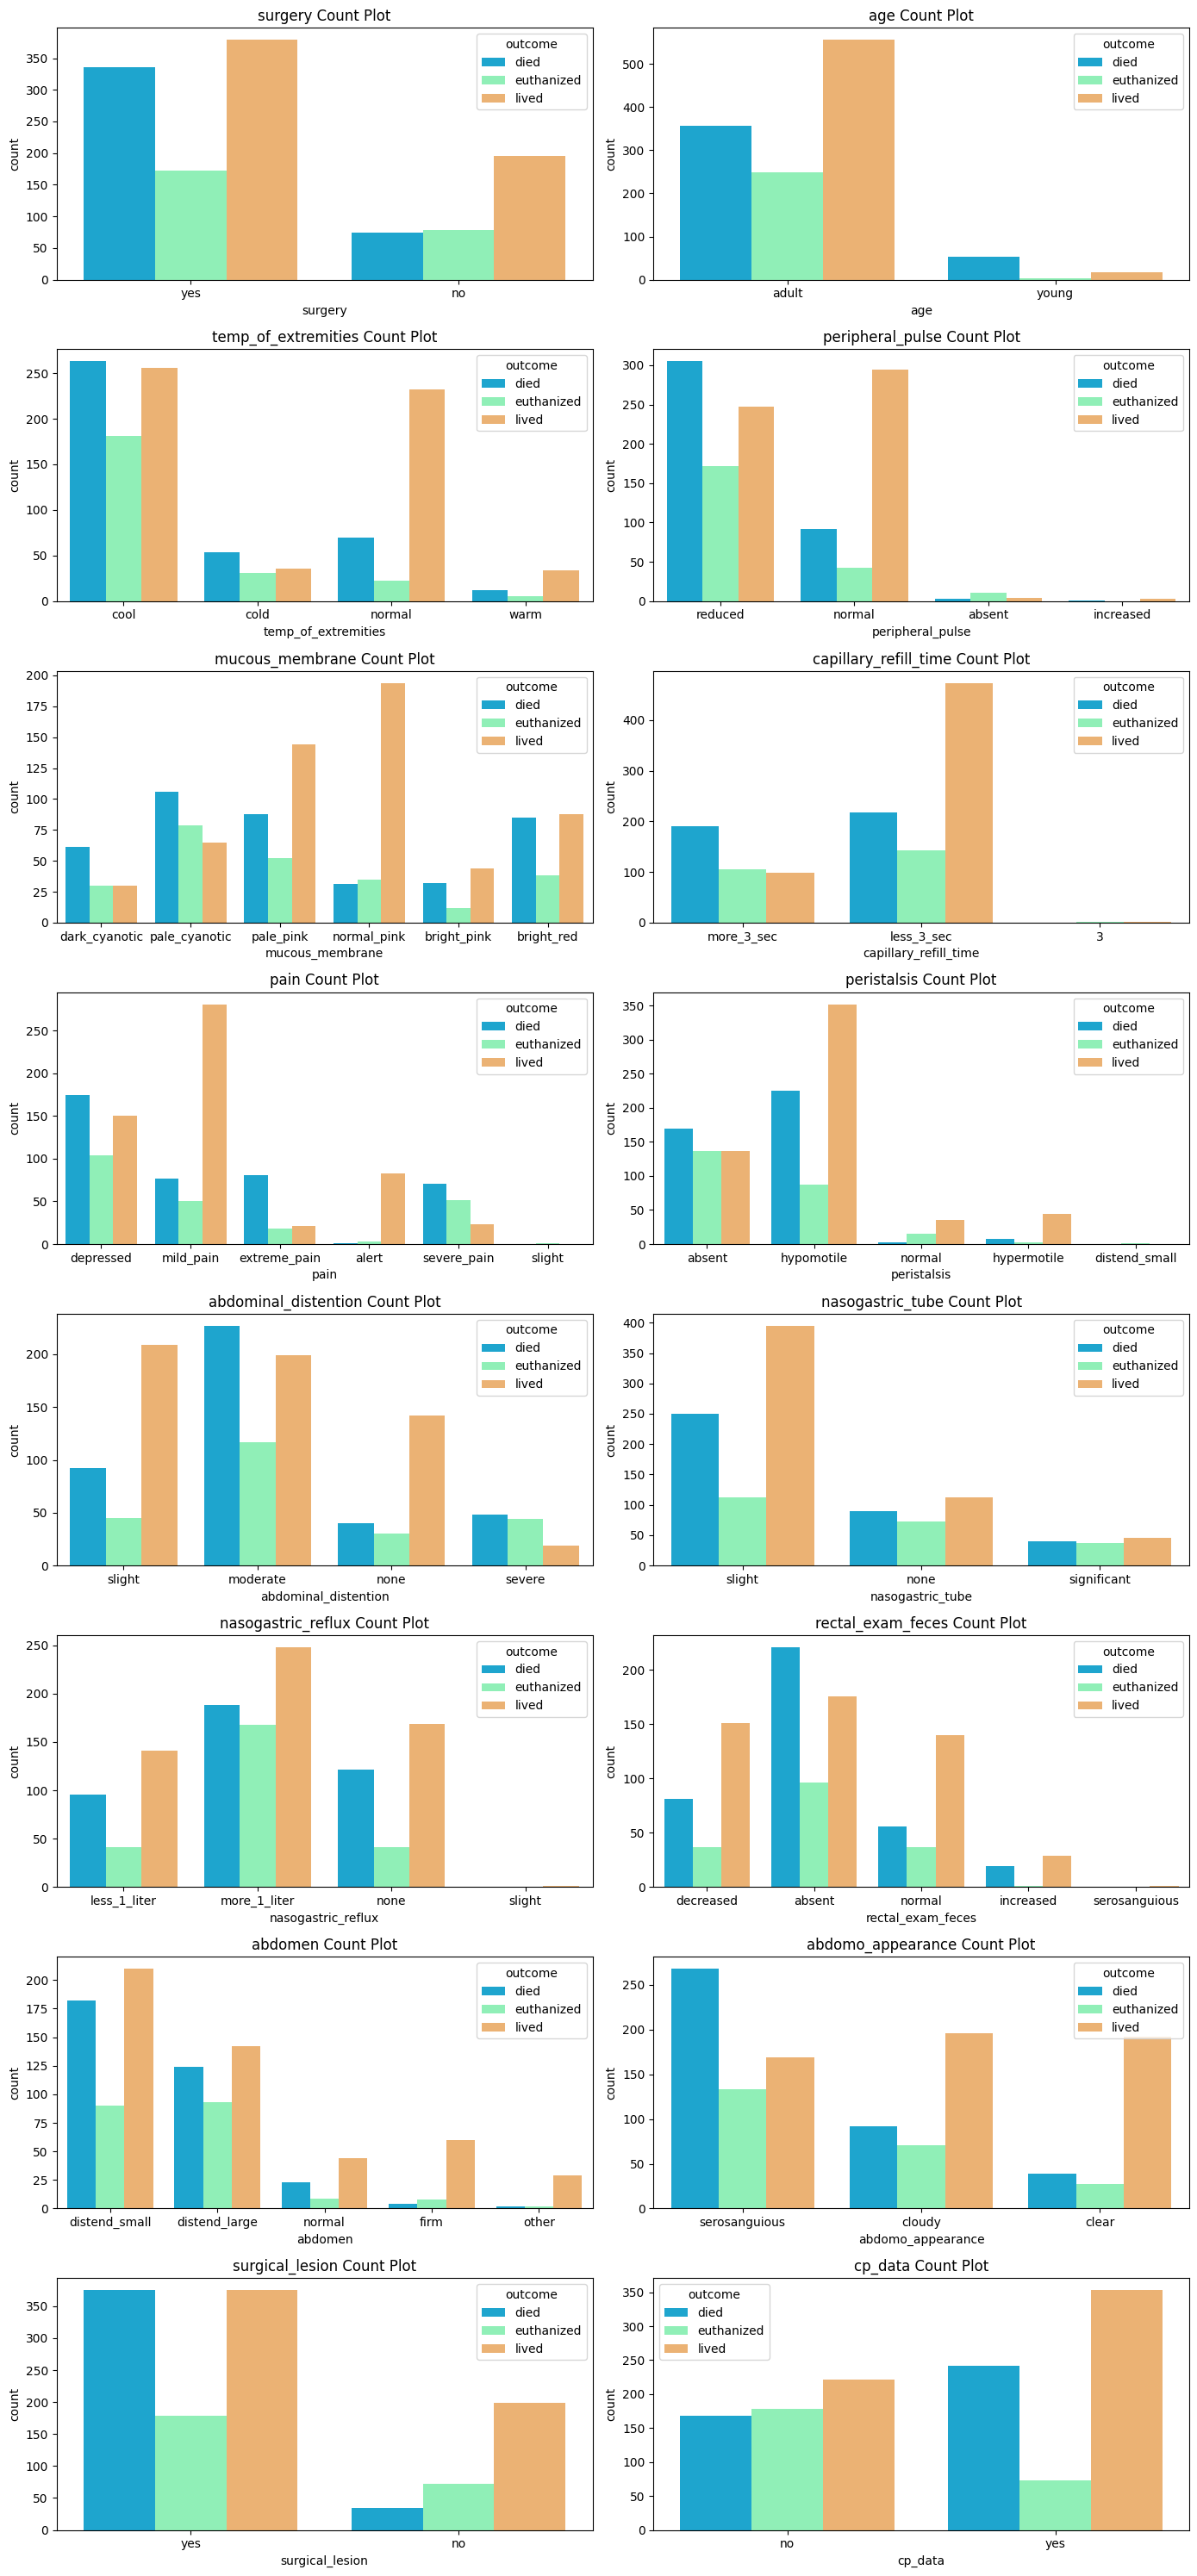

In [12]:
def plot(col,data):
    sns.countplot(x=col,data=data,hue='outcome',palette='rainbow')

plt.figure(figsize=(14,30))
for idx,column in enumerate(categorical_columns[:16]): 
    plt.subplot(len(categorical_columns)//2,2,idx+1)
    plot(column,data)
    plt.title(f"{column} Count Plot")
    plt.tight_layout()

#### Numerical Columns

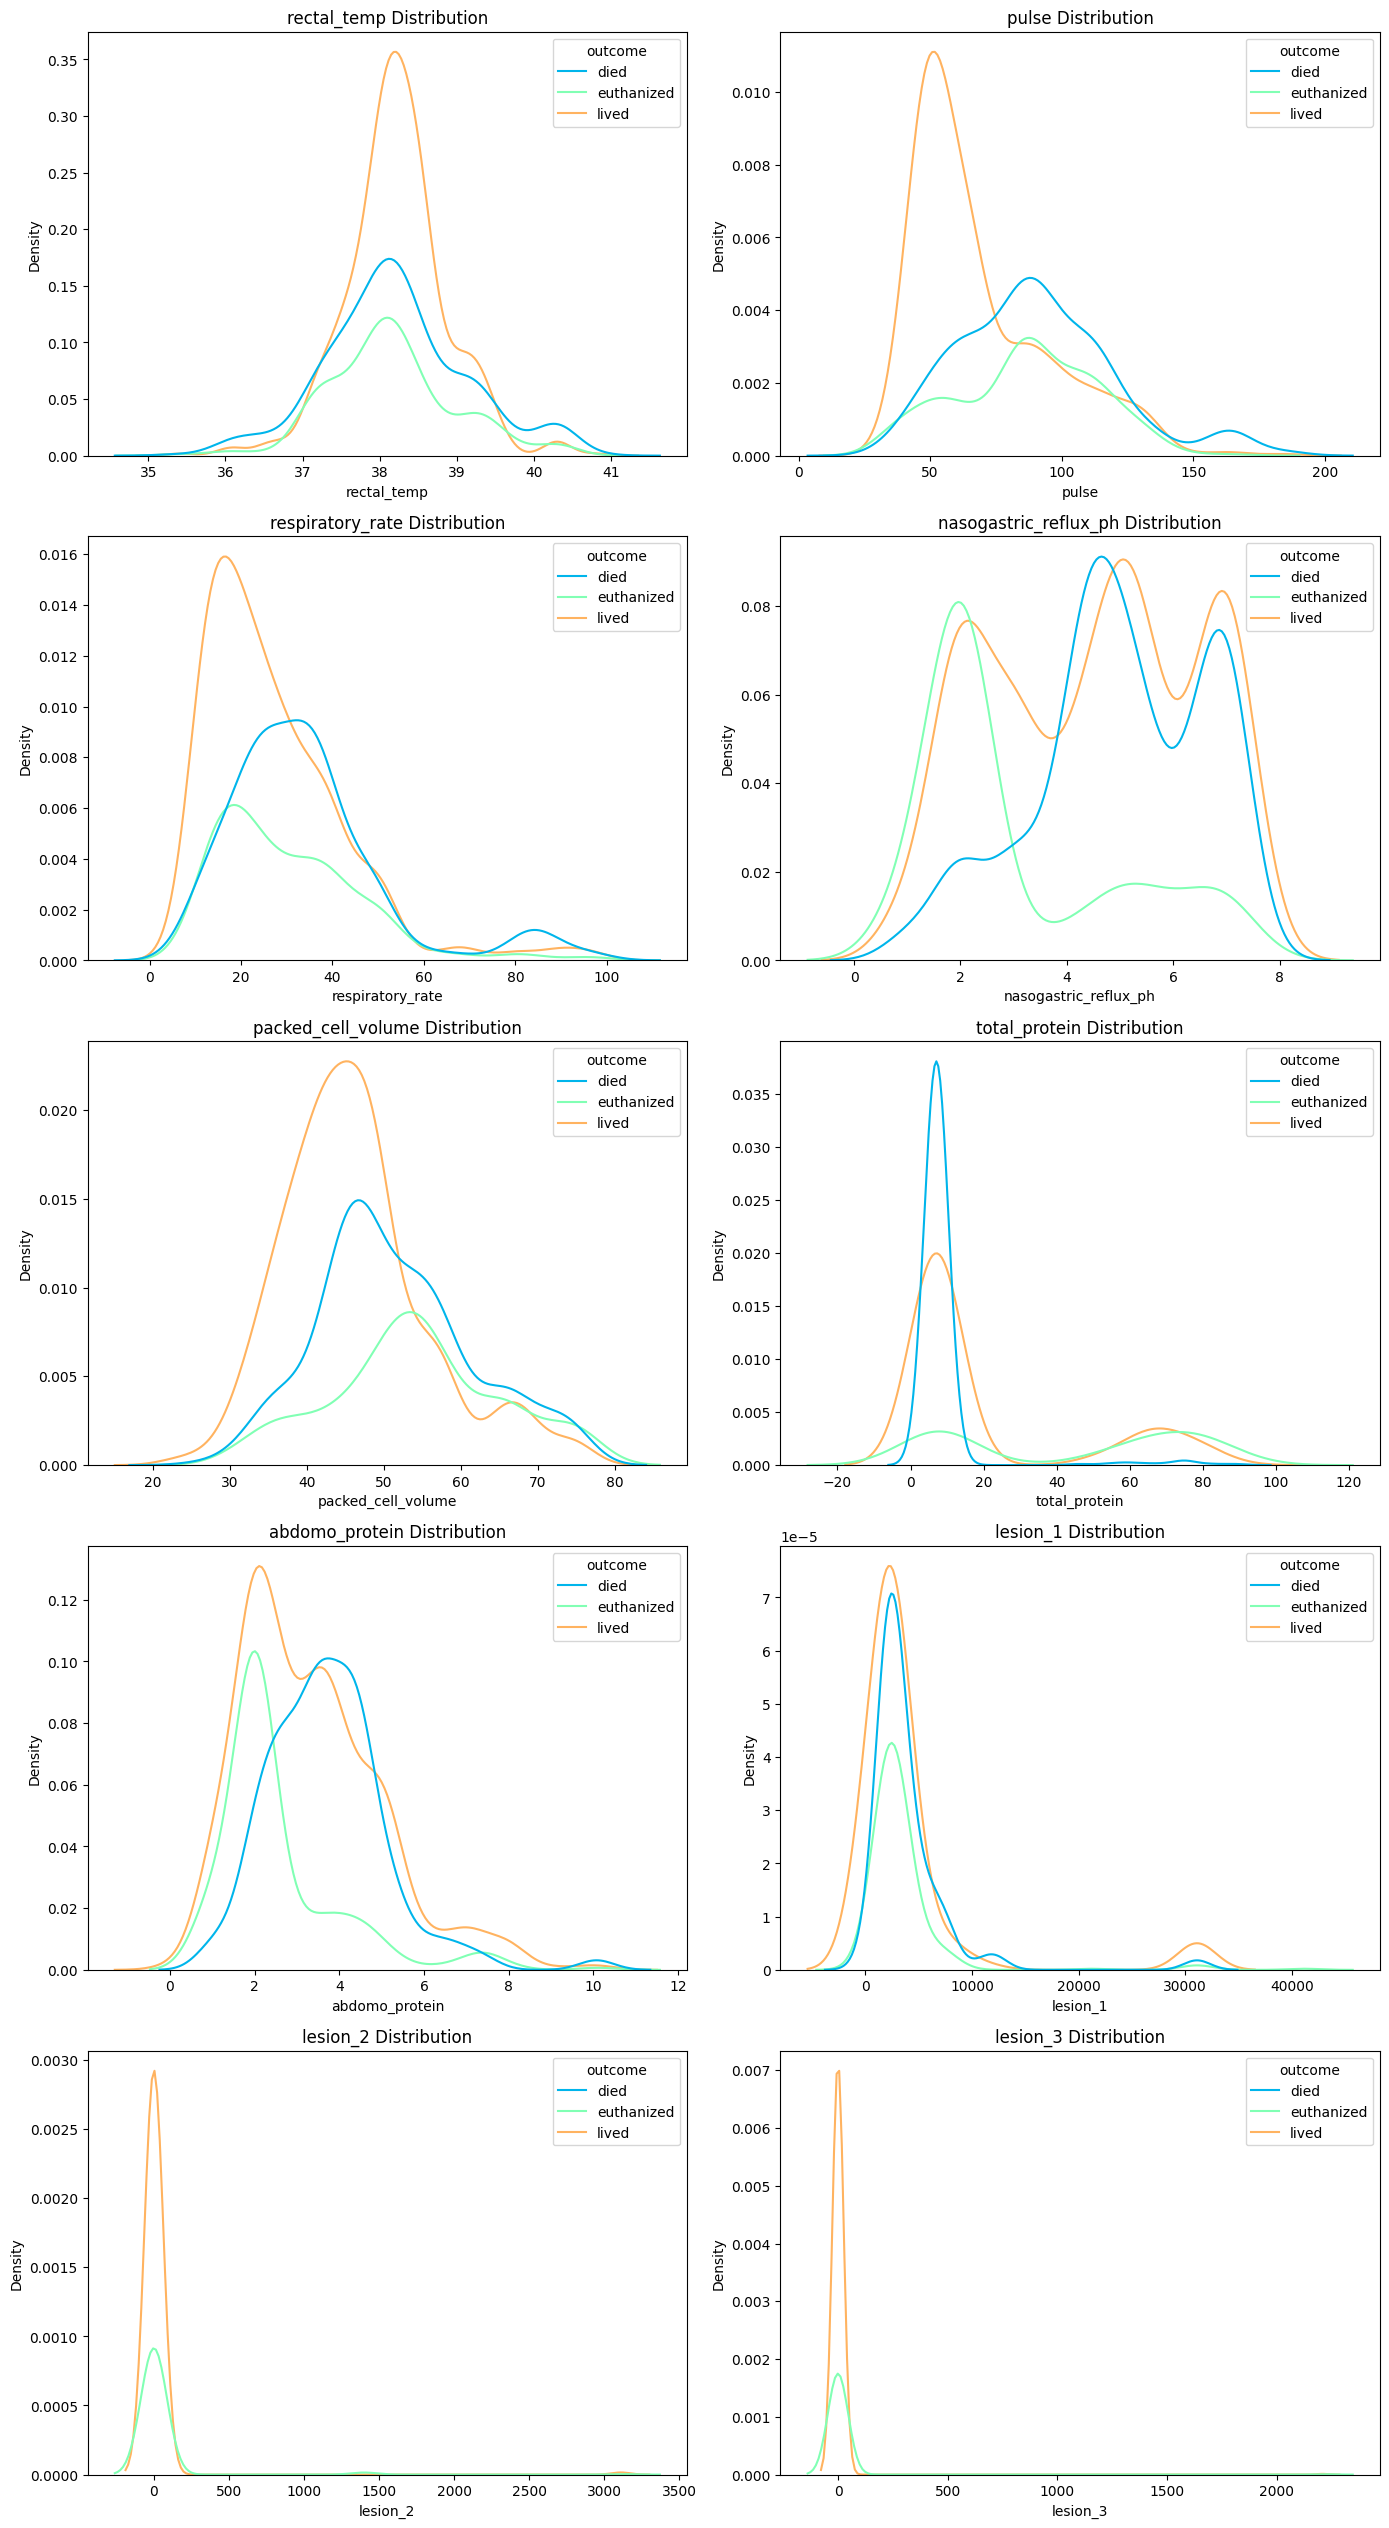

In [13]:
def plot(col,data):
    sns.kdeplot(x=col,data=data,hue='outcome',palette='rainbow')

plt.figure(figsize=(14,30))
for idx,column in enumerate(numerical_columns[2:]): 
    plt.subplot(len(numerical_columns)//2,2,idx+1)
    plot(column,data)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

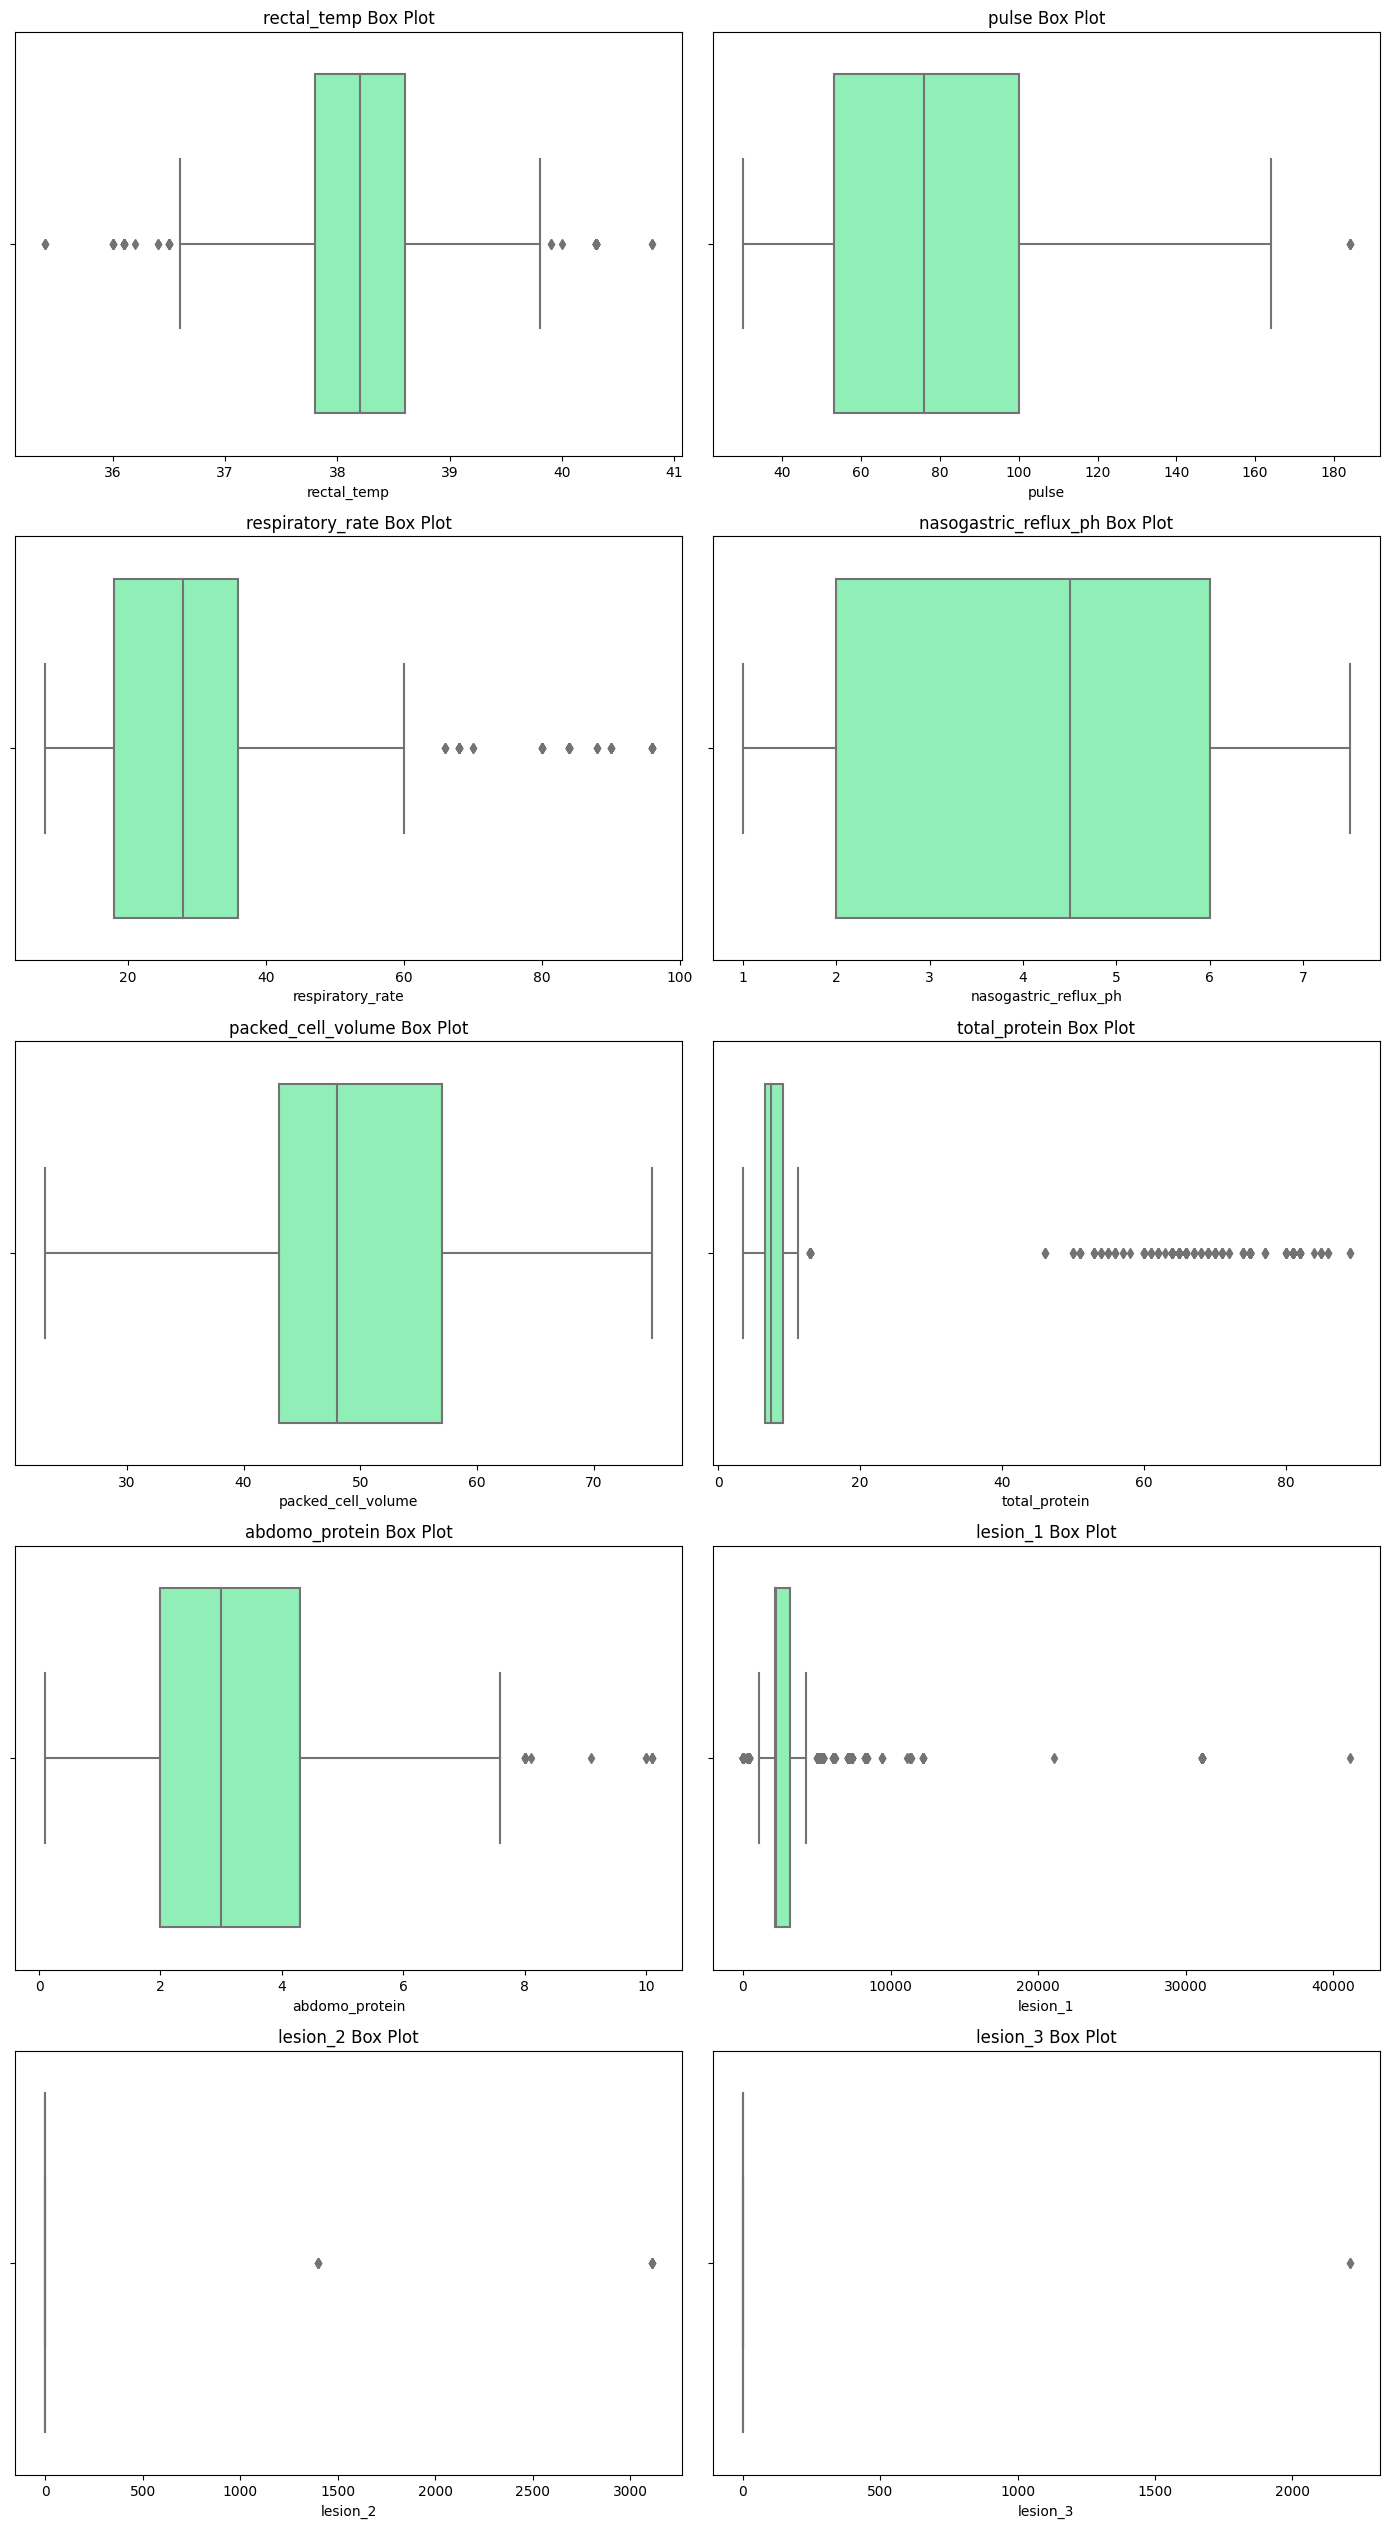

In [14]:
def plot(col,data):
    sns.boxplot(x=col,data=data,hue='outcome',palette='rainbow')

plt.figure(figsize=(14,30))
for idx,column in enumerate(numerical_columns[2:]): 
    plt.subplot(len(numerical_columns)//2,2,idx+1)
    plot(column,data)
    plt.title(f"{column} Box Plot")
    plt.tight_layout()

<Axes: >

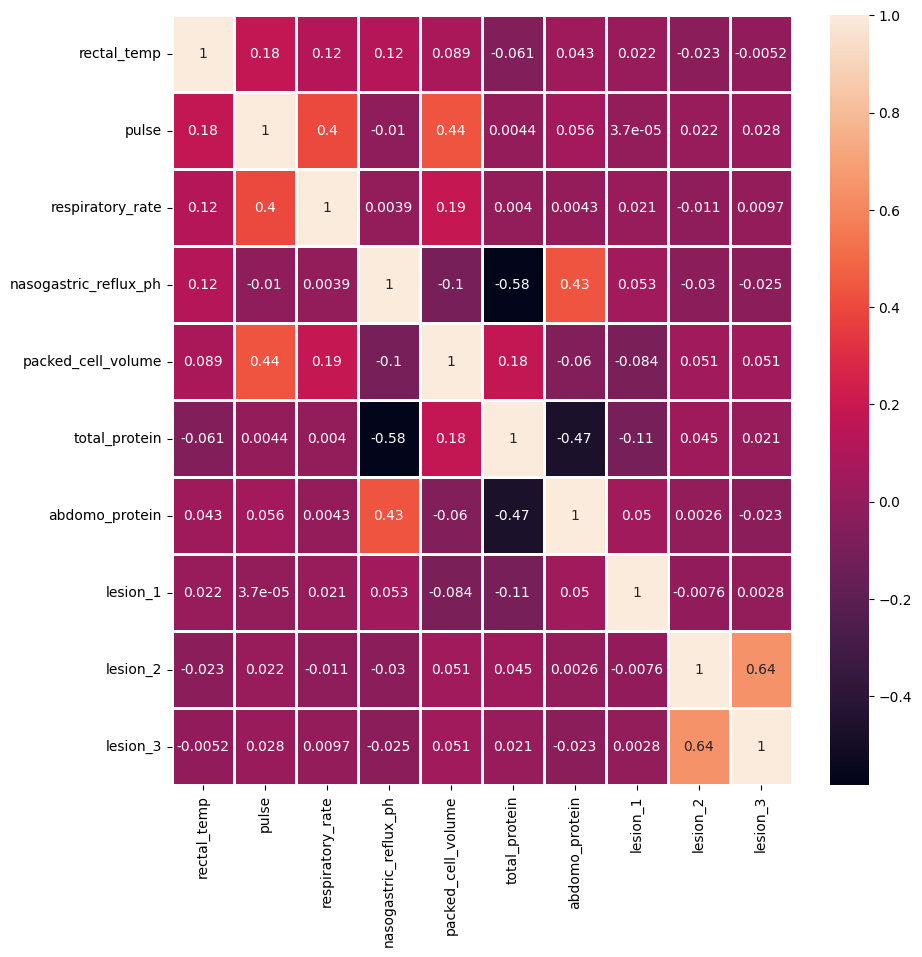

In [15]:
# corealtion amomg numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(train[numerical_columns[2:]].corr(numeric_only=True), annot=True, linewidths=1)

#### Missing Values

In [16]:
data.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [17]:
data[['lesion_2','lesion_3']].value_counts()

lesion_2  lesion_3
0         0           1227
1400      0              4
3111      2209           2
3112      0              2
Name: count, dtype: int64

**Key-TakeOvers**
1. id is not needed
2. need to convert catgeorical varaibles into discrete varaibles.
3. Hospital Number is categorical varaible with 255 unique values(Ignore if possible).
4. Data is not normal and slightly Skewed.
5. A Multi Classifaction Problem with Outcome as Target Varaible.
6. Look for Zero Occurence Problem in Test and Train datset.
7. Had Missing values fill accordingly (since data is less)
8. Need for Standardization as there some Outliers.
9. lesion_2 and lesion_3 can drop

#### Filling Missing Values

In [18]:
def fill_missin_values(data):
    
    ## categorical columns filled with most repeated value
    for col in categorical_columns[:16]:
        data[col].fillna(value=data[col].mode()[0],inplace=True)
    
fill_missin_values(data)
fill_missin_values(test)

#### Unique Values in both test and train datasets

In [19]:
unique_values={}
for col in categorical_columns[:16]:
    unique_values[col]= set(data[col].unique()).union(test[col].unique())

In [20]:
def cat_dis(data,unique_values):
    for col in unique_values:
        dummy=list(unique_values[col])
        data[col]=data[col].map({ dummy[j]:j for j in range(len(dummy)) })
cat_dis(data,unique_values)
cat_dis(test,unique_values)

In [21]:
data['outcome']=data['outcome'].map({
    'died':0,
    'euthanized':1,
    'lived':2
})

In [22]:
## feature selection
numerical_col=['rectal_temp', 'pulse', 'respiratory_rate','nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein','abdomo_protein','lesion_1']
categorical_col=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse','mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis','abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux','rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion','cp_data']
outcome='outcome'

#### Preparing Data for training

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[numerical_col+categorical_col],data[outcome], test_size = 0.25, random_state = 22,shuffle=True,stratify=data[outcome])

In [24]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
test_scaled=sc.transform(test[numerical_col+categorical_col])

## Modeling

In [25]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
def training(model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
   
    print("Model's Acuuracy is befor hyper parameters Tuning is",round(accuracy_score(y_test,y_pred),2))
    print(end='\n\n')

In [27]:
def grid_search(model,params):
    grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
    grid = grid.fit(X_train_scaled,y_train)
    dict_p = grid.best_params_
    return dict_p

#### AdaBoost Classifier

In [28]:
model=AdaBoostClassifier()
training(model)

params ={
    'n_estimators': [50,100,150,200,250],
    'learning_rate': [0.01,0.1,1,25,100]
}

best=grid_search(model,params)

grid_ada=AdaBoostClassifier(**best)
grid_ada.fit(X_train_scaled,y_train)
y_pred=grid_ada.predict(X_test_scaled)

print("Model Evaluation after Tuning \n",classification_report(y_test,y_pred))

Model's Acuuracy is befor hyper parameters Tuning is 0.67


Model Evaluation after Tuning 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.65      0.51      0.57        63
           2       0.68      0.75      0.72       144

    accuracy                           0.68       309
   macro avg       0.67      0.64      0.65       309
weighted avg       0.67      0.68      0.67       309



#### Gradient Bossting Classifier

In [29]:
model=GradientBoostingClassifier()
training(model)

params ={
    'n_estimators': [50,100,150,200,250],
    'learning_rate': [0.01,0.1,1,25,100],
    'criterion' :['friedman_mse', 'squared_error'],
}

best=grid_search(model,params)

grid_gsb=GradientBoostingClassifier(**best)
grid_gsb.fit(X_train_scaled,y_train)
y_pred=grid_gsb.predict(X_test_scaled)


print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Model's Acuuracy is befor hyper parameters Tuning is 0.69


Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.66      0.70      0.68       102
           1       0.72      0.60      0.66        63
           2       0.71      0.74      0.72       144

    accuracy                           0.70       309
   macro avg       0.70      0.68      0.69       309
weighted avg       0.70      0.70      0.70       309



#### Random Forest Classifier

In [30]:
model=RandomForestClassifier()
training(model)

params ={
    'n_estimators': [50,100,150,200,250],
    'criterion' :['gini', 'log_loss'],
}

best=grid_search(model,params)

grid_rf=RandomForestClassifier(**best)
grid_rf.fit(X_train_scaled,y_train)
y_pred=grid_rf.predict(X_test_scaled)


print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Model's Acuuracy is befor hyper parameters Tuning is 0.71


Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.66      0.76      0.71       102
           1       0.73      0.68      0.70        63
           2       0.76      0.69      0.72       144

    accuracy                           0.72       309
   macro avg       0.72      0.71      0.71       309
weighted avg       0.72      0.72      0.72       309



#### SVM

In [31]:
model=SVC()
training(model)

params ={
    'C': [0.1,0.5,0.75,1,2],
    'gamma' :['scale', 'auto'],
    'kernel':['rbf','sigmoid','poly']
}

best=grid_search(model,params)

grid_svc=SVC(**best)
grid_svc.fit(X_train_scaled,y_train)
y_pred=grid_svc.predict(X_test_scaled)


print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Model's Acuuracy is befor hyper parameters Tuning is 0.65


Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.61      0.73      0.66       102
           1       0.59      0.48      0.53        63
           2       0.67      0.63      0.65       144

    accuracy                           0.63       309
   macro avg       0.62      0.61      0.61       309
weighted avg       0.63      0.63      0.63       309



#### Decision Tree Classifier

In [32]:
model=DecisionTreeClassifier()
training(model)

params ={
    
}

best=grid_search(model,params)

grid_dt=DecisionTreeClassifier(**best)
grid_dt.fit(X_train_scaled,y_train)
y_pred=grid_dt.predict(X_test_scaled)


print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Model's Acuuracy is befor hyper parameters Tuning is 0.58


Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.56      0.61      0.58       102
           1       0.52      0.52      0.52        63
           2       0.67      0.63      0.65       144

    accuracy                           0.60       309
   macro avg       0.59      0.59      0.59       309
weighted avg       0.60      0.60      0.60       309



## Voting Classifier

In [33]:
voting=VotingClassifier(estimators=[('ada',grid_ada),('gsb',grid_gsb),('rf',grid_rf)],voting='hard')

voting.fit(X_train_scaled,y_train)
y_pred=voting.predict(X_test_scaled)

print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.67      0.72      0.69       102
           1       0.71      0.62      0.66        63
           2       0.72      0.73      0.73       144

    accuracy                           0.70       309
   macro avg       0.70      0.69      0.69       309
weighted avg       0.70      0.70      0.70       309



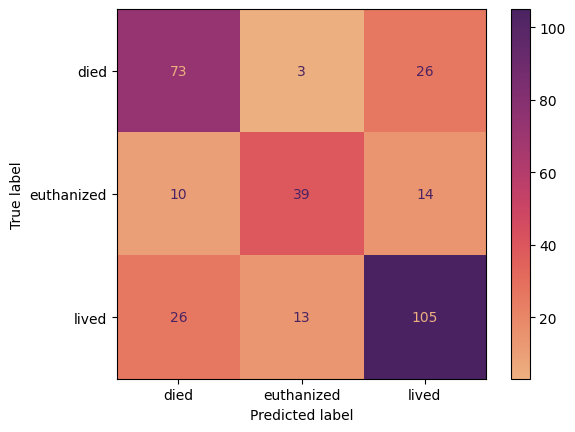

In [34]:
ConfusionMatrixDisplay.from_estimator(voting,X_test_scaled, y_test,display_labels=("died", "euthanized", "lived"),cmap='flare')

## Stacking Classifier

In [35]:
stacking=StackingClassifier(estimators=[('ada',grid_ada),('gsb',grid_gsb),('rf',grid_rf)],final_estimator=grid_gsb)

stacking.fit(X_train_scaled,y_train)
y_pred=stacking.predict(X_test_scaled)

print("Models Evaluation after tuning \n ",classification_report(y_test,y_pred))

Models Evaluation after tuning 
                precision    recall  f1-score   support

           0       0.66      0.70      0.68       102
           1       0.67      0.56      0.61        63
           2       0.70      0.73      0.71       144

    accuracy                           0.68       309
   macro avg       0.68      0.66      0.67       309
weighted avg       0.68      0.68      0.68       309



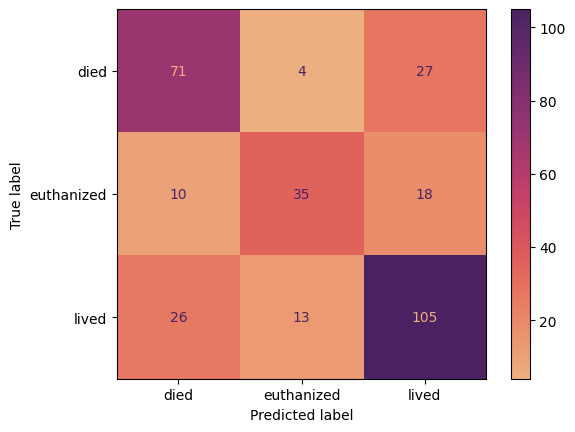

In [36]:
ConfusionMatrixDisplay.from_estimator(stacking,X_test_scaled, y_test,display_labels=("died", "euthanized", "lived"),cmap='flare')

## Predictions

In [37]:
test['predictions']=stacking.predict(test_scaled)

In [38]:
test['predictions']=test['predictions'].map({
    0:'died',
    1:'euthanized',
    2:'lived'
})